<div style="text-align: center">
<img src="https://raw.githubusercontent.com/xyizko/xo-mathz/refs/heads/main/gfx/x.jpeg">    
<img src="https://raw.githubusercontent.com/xyizko/xo-tagz/refs/heads/main/gfx/i.png">
</div>
<div style="background: black; color: #00ff00; padding: 2px; text-align: center;background-size: cover; padding: 10px; text-shadow: 00 0 20px #ec4899">
    <h1> Pandas Tutorial 2 </h1>
    
</div>

In [185]:
# Python BeautyPanty 

import logging
from rich import print as rprint  # For rprinting
from rich.pretty import pprint  # For pretty printing
from rich import inspect  # For inspect
from rich.console import Console  # For console.print
from rich.markdown import Markdown  # For markdow
from rich.panel import Panel  # For Panel()
from rich import box  # For Panel Boxes
from rich.prompt import Prompt  # For Prompting
from rich.style import Style  # For styles colors
from rich.text import Text  # For text Styles
from rich.logging import RichHandler
from rich.traceback import install
from rich.rule import Rule # Horizontal Line
import numpy as np
import random

console = Console()  # Standard code to access console
install(show_locals=True)

# Setting up rich logger with color
logging.basicConfig(
    level=logging.DEBUG,
    format="%(message)s",
    datefmt="[%X]",
    handlers=[RichHandler(rich_tracebacks=True, markup=True)],
)
log = logging.getLogger("rich")

# Horizontal Line 
def dividerz(title: str = "", color: str = ""):
    console.print(Rule(f"{title}", style=f"{color}"))

# boxa
def boxa(txt: str = "", title: str = "", subtitle: str = "", brd: str = ""):
    console.print(Panel.fit(f"{txt}",
                            title=f"{title}",
                            subtitle=f"{subtitle}", 
                            style="Italic", 
                            border_style=f"{brd}"))

# Pandas Specific 
import pandas as pd # Dataframe
import numpy as np # Numerical Operations
from scipy import stats # Stats 
import seaborn as sns # Seasborn Plots

# Matplotlib and setting dark mode
import matplotlib.pyplot as plt
# Setting Dark Mode
plt.style.use('dark_background')


# TOC
1. [What?](#What?)
2. [importing](#Importing)
3. [FilteringAndOrdering](#FilteringAndOrdering)
4. [Indexing ](#Index)
5. [Grouping and Aggregation](#GroupingAggregation)

[🔙](#TOC)

# What?

> More pandas and numpy practice. These libraries are the core of ML and I Pipelines.
>

## Regarding Statistical Analaysis and Python Libs 

1. The most common used libs are

Lib | What
:--: | :--: 
[`NumPy`](https://numpy.org/) | For numerical operations, matrix calculations and some stats 
[`SciPy`](https://scipy.org/) | More advanced mathematical operations for scientific computing had advanced Statistical Analysis 
[`matplotlib`](https://matplotlib.org/) | For highly customized plots, 3d plots
[`Seaborn`](https://seaborn.pydata.org/) | Built on top of matplotlib , higher level aesthetically pleasing
[`plotly`](https://plotly.com/) | Interactive , not open source, avoid unless absolutely necessary. Has AI assisted plotting

[🔙](#TOC)

# Importing

In [23]:
# Import Airlines_dataset
URL = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
da1 = pd.read_csv(URL)
da1

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


1. If there is a unicod error import it as a `raw string`

In [ ]:
# Inepecting Available methods on the DS 
inspect(da1, methods=True)

In [25]:
da1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [26]:
da1.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


 ## Importing a problematic DS

 1. DS = `cars-datasets-2-25`

        - A regular import will lead to a unicode error
 

In [27]:
# URL = "/kaggle/input/cars-datasets-2025/Cars Datasets 2025.csv"
# pd.read_csv(URL)

1. The problematic dataset below had an encoding error. This can't be solved with a raw string input, instead we have to specify the output

In [28]:
# Fixing above error with encoding
URL = "/kaggle/input/cars-datasets-2025/Cars Datasets 2025.csv"
cd1  = pd.read_csv(URL, encoding="latin1")
cd1

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


In [29]:
# Removing the index for easier navigation 

cd11 = pd.read_csv(URL, encoding="latin1", header = None)
cd11

,0,1,2,3,4,5,6,7,8,9,10
0,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
2,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
3,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
4,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1214,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1215,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1216,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1217,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


In [30]:
# Extracting the main df for renaming 

# Examinig the type of the column names
rprint(cd11.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [31]:
# Extracting single columns 
cd11.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1219 non-null   object
 1   1       1219 non-null   object
 2   2       1219 non-null   object
 3   3       1216 non-null   object
 4   4       1219 non-null   object
 5   5       1219 non-null   object
 6   6       1213 non-null   object
 7   7       1219 non-null   object
 8   8       1219 non-null   object
 9   9       1219 non-null   object
 10  10      1218 non-null   object
dtypes: object(11)
memory usage: 104.9+ KB


In [32]:
# Crrect syntax 
cd11[[2, 5, 7]] 

,2,5,7
0,Engines,Total Speed,Cars Prices
1,V8,340 km/h,"$1,100,000"
2,V12,250 km/h,"$460,000"
3,1.2L Petrol,165 km/h,"$12,000-$15,000"
4,V8,250 km/h,"$161,000"
...,...,...,...
1214,2.5L Hybrid I4,180 km/h,"$43,590  $48,000"
1215,2.4L Turbo I4 (i-FORCE MAX Hybrid),180 km/h,"$50,000"
1216,2.0L Gas / 2.0L Hybrid,190 km/h,"$25,210  $29,135"
1217,1.8L / 2.0L Hybrid,180 km/h," 33,000"


In [33]:
# Make a separate DF with the extrated columns , whose headings ar integers
cd111 = cd11[[2, 5, 7]] 
cd111

,2,5,7
0,Engines,Total Speed,Cars Prices
1,V8,340 km/h,"$1,100,000"
2,V12,250 km/h,"$460,000"
3,1.2L Petrol,165 km/h,"$12,000-$15,000"
4,V8,250 km/h,"$161,000"
...,...,...,...
1214,2.5L Hybrid I4,180 km/h,"$43,590  $48,000"
1215,2.4L Turbo I4 (i-FORCE MAX Hybrid),180 km/h,"$50,000"
1216,2.0L Gas / 2.0L Hybrid,190 km/h,"$25,210  $29,135"
1217,1.8L / 2.0L Hybrid,180 km/h," 33,000"


In [34]:
# Rename the headings to the 0 index 
cd111.columns = cd111.iloc[0]

In [35]:
cd111 # Checking if move occurred

,Engines,Total Speed,Cars Prices
0,Engines,Total Speed,Cars Prices
1,V8,340 km/h,"$1,100,000"
2,V12,250 km/h,"$460,000"
3,1.2L Petrol,165 km/h,"$12,000-$15,000"
4,V8,250 km/h,"$161,000"
...,...,...,...
1214,2.5L Hybrid I4,180 km/h,"$43,590  $48,000"
1215,2.4L Turbo I4 (i-FORCE MAX Hybrid),180 km/h,"$50,000"
1216,2.0L Gas / 2.0L Hybrid,190 km/h,"$25,210  $29,135"
1217,1.8L / 2.0L Hybrid,180 km/h," 33,000"


In [36]:
# Now remove the first row , this will cause the 0 index to change 
cd111 = cd111[1:]

In [37]:
# Altered df without 0 index - fixed index 
cd111

,Engines,Total Speed,Cars Prices
1,V8,340 km/h,"$1,100,000"
2,V12,250 km/h,"$460,000"
3,1.2L Petrol,165 km/h,"$12,000-$15,000"
4,V8,250 km/h,"$161,000"
5,V10,320 km/h,"$253,290"
...,...,...,...
1214,2.5L Hybrid I4,180 km/h,"$43,590  $48,000"
1215,2.4L Turbo I4 (i-FORCE MAX Hybrid),180 km/h,"$50,000"
1216,2.0L Gas / 2.0L Hybrid,190 km/h,"$25,210  $29,135"
1217,1.8L / 2.0L Hybrid,180 km/h," 33,000"


In [38]:
# Add arbitrary headings to test manual renaming 

cd111a = cd111.copy()

In [39]:
cd111a

,Engines,Total Speed,Cars Prices
1,V8,340 km/h,"$1,100,000"
2,V12,250 km/h,"$460,000"
3,1.2L Petrol,165 km/h,"$12,000-$15,000"
4,V8,250 km/h,"$161,000"
5,V10,320 km/h,"$253,290"
...,...,...,...
1214,2.5L Hybrid I4,180 km/h,"$43,590  $48,000"
1215,2.4L Turbo I4 (i-FORCE MAX Hybrid),180 km/h,"$50,000"
1216,2.0L Gas / 2.0L Hybrid,190 km/h,"$25,210  $29,135"
1217,1.8L / 2.0L Hybrid,180 km/h," 33,000"


In [40]:
# Rename the headers arbitratirly 
# eg: df.columns = ['new_name_1', 'new_name_2', 'new_name_3', ...]

cd111a.columns = ['fli', 'sto', 'des']

In [41]:
cd111a

,fli,sto,des
1,V8,340 km/h,"$1,100,000"
2,V12,250 km/h,"$460,000"
3,1.2L Petrol,165 km/h,"$12,000-$15,000"
4,V8,250 km/h,"$161,000"
5,V10,320 km/h,"$253,290"
...,...,...,...
1214,2.5L Hybrid I4,180 km/h,"$43,590  $48,000"
1215,2.4L Turbo I4 (i-FORCE MAX Hybrid),180 km/h,"$50,000"
1216,2.0L Gas / 2.0L Hybrid,190 km/h,"$25,210  $29,135"
1217,1.8L / 2.0L Hybrid,180 km/h," 33,000"


1. Note this method is also easier, to replace the df column names, to something easier to call.
2. Then in the final DF , rename it back to what it was 

Note how the headers are removed , and now they are indexes

In [42]:
# Info of the original Df
da1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [44]:
da1.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [45]:
# Note - Col names are all case-sensitive
da1['airline']

0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object

In [46]:
# Viewing on specific element - Using loc 
da1.loc[4]

index                     4
airline             Vistara
flight               UK-963
source_city           Delhi
departure_time      Morning
stops                  zero
arrival_time        Morning
destination_city     Mumbai
class               Economy
duration               2.33
days_left                 1
price                  5955
Name: 4, dtype: object

In [50]:
# da1.loc['Delhi']

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


[🔙](#TOC)

# FilteringAndOrdering


In [3]:
# Import Airlines_dataset
URL = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
da1 = pd.read_csv(URL)
da1

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


> Note for this section using the World Population Dataset from kaggle

In [4]:
# Import World Population Data Set
URL = "/kaggle/input/world-population-dataset/world_population.csv"
po1 = pd.read_csv(URL)
po1

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [5]:
po1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [6]:
# Conditional Filtering 
# List all rows where the rank is < 10 

po1[po1['Rank'] <= 10]


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24


In [7]:
# Extracting specific countries 

specific_countries = ['Mexico', 'Russia', 'Brazil']

# isin function
po1[po1['Country/Territory'].isin(specific_countries)]

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81


In [8]:
# Contains is more generic
po1[po1['Country/Territory'].str.contains('United')]

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
219,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9441129,9287289,8916899,8481771,3275333,1900151,1014048,298084,83600,112.9322,1.0081,0.12
220,21,GBR,United Kingdom,London,Europe,67508936,67059474,65224364,62760039,58850043,57210442,56326328,55650166,242900,277.9289,1.0034,0.85
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
222,200,VIR,United States Virgin Islands,Charlotte Amalie,North America,99465,100442,102803,106142,108185,100685,96640,63446,347,286.6427,0.9937,0.00


In [9]:
# Change ColumnName - Country/Territory to Country 

# Make new Copy of df 
po2 = po1.copy()

# Rename the index in po2 

po2.rename(columns={'Country/Territory': 'Country'}, inplace=True)

In [10]:
#  Column has been renamed 
po2

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [11]:
# Now  change the index from integer to column name 

po21 = po2.set_index('Country')
po21

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
Western Sahara,172,ESH,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
Yemen,46,YEM,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42


In [12]:
# Filter Function 

po21.filter(items = ['Continet', 'CCA3'])

,CCA3
Country,
Afghanistan,AFG
Albania,ALB
Algeria,DZA
American Samoa,ASM
Andorra,AND
...,...
Wallis and Futuna,WLF
Western Sahara,ESH
Yemen,YEM


In [19]:
# Searching for contains 
po2[po2['Country'].str.contains('United')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
219,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9441129,9287289,8916899,8481771,3275333,1900151,1014048,298084,83600,112.9322,1.0081,0.12
220,21,GBR,United Kingdom,London,Europe,67508936,67059474,65224364,62760039,58850043,57210442,56326328,55650166,242900,277.9289,1.0034,0.85
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
222,200,VIR,United States Virgin Islands,Charlotte Amalie,North America,99465,100442,102803,106142,108185,100685,96640,63446,347,286.6427,0.9937,0.00


In [27]:
# This will search on the 1 axis Along rows 
po21.filter(['Country', 'CCA3'], axis = 1)

,CCA3
Country,
Afghanistan,AFG
Albania,ALB
Algeria,DZA
American Samoa,ASM
Andorra,AND
...,...
Wallis and Futuna,WLF
Western Sahara,ESH
Yemen,YEM


In [28]:
# Searchin by row 
po21.filter(['Country', 'CCA3'], axis = 0)

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage


In [32]:
# Search on 0 axis for as specific country since the countries are not the index 
# This will bring up the match  by the index , which will results in the row
po21.filter(items = ['Zimbabwe'], axis = 0)

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Zimbabwe,74,ZWE,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.2


In [33]:
po21.filter(items = ['China'], axis = 0)

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0,17.88


In [36]:
# using like - Syntax simpler thatn str.contains
po21.filter(like = 'United', axis = 0)

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
United Arab Emirates,97,ARE,Abu Dhabi,Asia,9441129,9287289,8916899,8481771,3275333,1900151,1014048,298084,83600,112.9322,1.0081,0.12
United Kingdom,21,GBR,London,Europe,67508936,67059474,65224364,62760039,58850043,57210442,56326328,55650166,242900,277.9289,1.0034,0.85
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
United States Virgin Islands,200,VIR,Charlotte Amalie,North America,99465,100442,102803,106142,108185,100685,96640,63446,347,286.6427,0.9937,0.00


In [39]:
# using loc and loc
po21.loc['United Kingdom']

Rank                                 21
CCA3                                GBR
Capital                          London
Continent                        Europe
2022 Population                67508936
2020 Population                67059474
2015 Population                65224364
2010 Population                62760039
2000 Population                58850043
1990 Population                57210442
1980 Population                56326328
1970 Population                55650166
Area (km²)                       242900
Density (per km²)              277.9289
Growth Rate                      1.0034
World Population Percentage        0.85
Name: United Kingdom, dtype: object

In [43]:
# Interger Location 
po2.iloc[1]

Rank                               138
CCA3                               ALB
Country                        Albania
Capital                         Tirana
Continent                       Europe
2022 Population                2842321
2020 Population                2866849
2015 Population                2882481
2010 Population                2913399
2000 Population                3182021
1990 Population                3295066
1980 Population                2941651
1970 Population                2324731
Area (km²)                       28748
Density (per km²)              98.8702
Growth Rate                     0.9957
World Population Percentage       0.04
Name: 1, dtype: object

## Ordering

In [46]:
# Searching for rank less than 10 
po21[po21['Rank'] < 10]

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Bangladesh,8,BGD,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
Nigeria,6,NGA,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
Pakistan,5,PAK,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
Russia,9,RUS,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24


In [50]:
# Sorting the Rank column by rank - will see rank in ascending order
po21[po21['Rank'] < 10].sort_values(by="Rank")

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
Pakistan,5,PAK,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
Nigeria,6,NGA,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
Bangladesh,8,BGD,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
Russia,9,RUS,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81


1. Getting an output to sorting is highly dependent in supplying the right values

In [57]:
po21[po21["2022 Population"] > 100000].sort_values(by="2022 Population")

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Saint Vincent and the Grenadines,199,VCT,Kingstown,North America,103948,104632,106482,109308,113813,112487,107480,98459,389,267.2185,0.9963,0.00
Aruba,198,ABW,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00
Tonga,197,TON,Nuku‘alofa,Oceania,106858,105254,106122,107383,102603,98727,96708,86484,747,143.0495,1.0079,0.00
Seychelles,196,SYC,Victoria,Africa,107118,105530,99240,92409,80060,71057,65290,54379,452,236.9867,1.0061,0.00
Jersey,195,JEY,Saint Helier,Europe,110778,108319,100561,96151,86192,82874,75124,68347,116,954.9828,1.0106,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pakistan,5,PAK,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24


In [58]:
# Sorting the Rank column by rank - will see rank in descending
po21[po21['Rank'] < 10].sort_values(by="Rank", ascending=False)

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Russia,9,RUS,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
Bangladesh,8,BGD,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
Nigeria,6,NGA,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
Pakistan,5,PAK,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88


In [63]:
# Sorting by more than one column - 
po21[po21['Rank'] < 10].sort_values(['Rank', 'Country'], ascending=False)

# > 
po21[po21['Rank'] < 10].sort_values(['Country', 'Rank'], ascending=[False, True])

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
United States,3,USA,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
Russia,9,RUS,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
Pakistan,5,PAK,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
Nigeria,6,NGA,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
Indonesia,4,IDN,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
India,2,IND,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
China,1,CHN,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
Brazil,7,BRA,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
Bangladesh,8,BGD,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


[🔙](#TOC)

# Index

1. Index is very customizable

In [67]:
# Import World Population Data Set
URL = "/kaggle/input/world-population-dataset/world_population.csv"
po3 = pd.read_csv(URL, index_col = "Country/Territory")
po3

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country/Territory,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
Western Sahara,172,ESH,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
Yemen,46,YEM,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42


In [68]:
# Resetting index from DF import
po3.reset_index(inplace=True)

In [69]:
po3

,Country/Territory,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,Western Sahara,172,ESH,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,Yemen,46,YEM,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,Zambia,63,ZMB,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [73]:
# Setting index after import 
po31 = po3.copy()
po31

,Country/Territory,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,Western Sahara,172,ESH,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,Yemen,46,YEM,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,Zambia,63,ZMB,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [86]:
# Changing the index manually
po31.set_index('Country/Territory', inplace=True)

In [87]:
po31

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country/Territory,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
Western Sahara,172,ESH,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
Yemen,46,YEM,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42


In [89]:
# loc

po31.loc['Yemen']

Rank                                 46
CCA3                                YEM
Capital                           Sanaa
Continent                          Asia
2022 Population                33696614
2020 Population                32284046
2015 Population                28516545
2010 Population                24743946
2000 Population                18628700
1990 Population                13375121
1980 Population                 9204938
1970 Population                 6843607
Area (km²)                       527968
Density (per km²)               63.8232
Growth Rate                      1.0217
World Population Percentage        0.42
Name: Yemen, dtype: object

In [91]:
po31.iloc[1]

Rank                               138
CCA3                               ALB
Capital                         Tirana
Continent                       Europe
2022 Population                2842321
2020 Population                2866849
2015 Population                2882481
2010 Population                2913399
2000 Population                3182021
1990 Population                3295066
1980 Population                2941651
1970 Population                2324731
Area (km²)                       28748
Density (per km²)              98.8702
Growth Rate                     0.9957
World Population Percentage       0.04
Name: Albania, dtype: object

In [92]:
# Multiple Indexes 
po2

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [97]:
# Make new copy of DF - Note everytime this is done memory is used 
po32 = po2.copy()

In [96]:
po32

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [99]:
# Rename the index 
po32.rename(columns={'Country/Territory': 'Country'}, inplace=True)

In [100]:
po32

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [102]:
# Setting two indexes - 
po32.set_index(['Continent', 'Country'], inplace=True)

In [103]:
po32

,,Rank,CCA3,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,Country,,,,,,,,,,,,,,,
Asia,Afghanistan,36,AFG,Kabul,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Europe,Albania,138,ALB,Tirana,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Africa,Algeria,34,DZA,Algiers,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
Oceania,American Samoa,213,ASM,Pago Pago,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
Europe,Andorra,203,AND,Andorra la Vella,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oceania,Wallis and Futuna,226,WLF,Mata-Utu,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
Africa,Western Sahara,172,ESH,El Aaiún,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
Asia,Yemen,46,YEM,Sanaa,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42


In [104]:
# Info will show how many indexes the df has
po32.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 234 entries, ('Asia', 'Afghanistan') to ('Africa', 'Zimbabwe')
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Capital                      234 non-null    object 
 3   2022 Population              234 non-null    int64  
 4   2020 Population              234 non-null    int64  
 5   2015 Population              234 non-null    int64  
 6   2010 Population              234 non-null    int64  
 7   2000 Population              234 non-null    int64  
 8   1990 Population              234 non-null    int64  
 9   1980 Population              234 non-null    int64  
 10  1970 Population              234 non-null    int64  
 11  Area (km²)                   234 non-null    int64  
 12  Density (per km²)            234 non-

In [105]:
# Sorting by index will also group it 
po32.sort_index()

Rank CCA3      Capital  2022 Population  \
Continent     Country                                                 
Africa        Algeria         34  DZA      Algiers         44903225   
              Angola          42  AGO       Luanda         35588987   
              Benin           77  BEN   Porto-Novo         13352864   
              Botswana       144  BWA     Gaborone          2630296   
              Burkina Faso    58  BFA  Ouagadougou         22673762   
...                          ...  ...          ...              ...   
South America Paraguay       109  PRY     Asunción          6780744   
              Peru            44  PER         Lima         34049588   
              Suriname       170  SUR   Paramaribo           618040   
              Uruguay        133  URY   Montevideo          3422794   
              Venezuela       51  VEN      Caracas         28301696   

                            2020 Population  2015 Population  2010 Population  \
Continent     Country                                                           
Africa        Algeria              43451666         39543154         35856344   
              Angola               33428485         28127721         23364185   
              Benin                12643123         10932783          9445710   
              Botswana              2546402          2305171          2091664   
              Burkina Faso         21522626         18718019         16116845   
...                                     ...              ...              ...   
South America Paraguay              6618695          6177950          5768613   
              Peru                 33304756         30711863         29229572   
              Suriname               607065           575475           546080   
              Uruguay               3429086          3402818          3352651   
              Venezuela            28490453         30529716         28715022   

                            2000 Population  1990 Population  1980 Population  \
Continent     Country                                                           
Africa        Algeria              30774621         25518074         18739378   
              Angola               16394062         11828638          8330047   
              Benin                 6998023          5133419          3833939   
              Botswana              1726985          1341474           938578   
              Burkina Faso         11882888          9131361          6932967   
...                                     ...              ...              ...   
South America Paraguay              5123819          4059195          3078912   
              Peru                 26654439         22109099         17492406   
              Suriname               478998           412756           375112   
              Uruguay               3292224          3117012          2953750   
              Venezuela            24427729         19750579         15210443   

                            1970 Population  Area (km²)  Density (per km²)  \
Continent     Country                                                        
Africa        Algeria              13795915     2381741            18.8531   
              Angola                6029700     1246700            28.5466   
              Benin                 3023443      112622           118.5635   
              Botswana               592244      582000             4.5194   
              Burkina Faso          5611666      272967            83.0641   
...                                     ...         ...                ...   
South America Paraguay              2408787      406752            16.6705   
              Peru                 13562371     1285216            26.4933   
              Suriname               379918      163820             3.7727   
              Uruguay               2790265      181034            18.9069   
              Venezuela            11355475      916445     

In [107]:
# Setting index descending 
po32.sort_index(ascending=False)

Rank CCA3      Capital  2022 Population  \
Continent     Country                                                 
South America Venezuela       51  VEN      Caracas         28301696   
              Uruguay        133  URY   Montevideo          3422794   
              Suriname       170  SUR   Paramaribo           618040   
              Peru            44  PER         Lima         34049588   
              Paraguay       109  PRY     Asunción          6780744   
...                          ...  ...          ...              ...   
Africa        Burkina Faso    58  BFA  Ouagadougou         22673762   
              Botswana       144  BWA     Gaborone          2630296   
              Benin           77  BEN   Porto-Novo         13352864   
              Angola          42  AGO       Luanda         35588987   
              Algeria         34  DZA      Algiers         44903225   

                            2020 Population  2015 Population  2010 Population  \
Continent     Country                                                           
South America Venezuela            28490453         30529716         28715022   
              Uruguay               3429086          3402818          3352651   
              Suriname               607065           575475           546080   
              Peru                 33304756         30711863         29229572   
              Paraguay              6618695          6177950          5768613   
...                                     ...              ...              ...   
Africa        Burkina Faso         21522626         18718019         16116845   
              Botswana              2546402          2305171          2091664   
              Benin                12643123         10932783          9445710   
              Angola               33428485         28127721         23364185   
              Algeria              43451666         39543154         35856344   

                            2000 Population  1990 Population  1980 Population  \
Continent     Country                                                           
South America Venezuela            24427729         19750579         15210443   
              Uruguay               3292224          3117012          2953750   
              Suriname               478998           412756           375112   
              Peru                 26654439         22109099         17492406   
              Paraguay              5123819          4059195          3078912   
...                                     ...              ...              ...   
Africa        Burkina Faso         11882888          9131361          6932967   
              Botswana              1726985          1341474           938578   
              Benin                 6998023          5133419          3833939   
              Angola               16394062         11828638          8330047   
              Algeria              30774621         25518074         18739378   

                            1970 Population  Area (km²)  Density (per km²)  \
Continent     Country                                                        
South America Venezuela            11355475      916445            30.8820   
              Uruguay               2790265      181034            18.9069   
              Suriname               379918      163820             3.7727   
              Peru                 13562371     1285216            26.4933   
              Paraguay              2408787      406752            16.6705   
...                                     ...         ...                ...   
Africa        Burkina Faso          5611666      272967            83.0641   
              Botswana               592244      582000             4.5194   
              Benin                 3023443      112622           118.5635   
              Angola                6029700     1246700            28.5466   
              Algeria              13795915     2381741     

In [108]:
# Sorting the index such that , Continent = False , Country = True
po32.sort_index(ascending=[False, True])

Rank CCA3       Capital  2022 Population  \
Continent     Country                                                    
South America Argentina         33  ARG  Buenos Aires         45510318   
              Bolivia           80  BOL         Sucre         12224110   
              Brazil             7  BRA      Brasilia        215313498   
              Chile             65  CHL      Santiago         19603733   
              Colombia          28  COL        Bogota         51874024   
...                            ...  ...           ...              ...   
Africa        Tunisia           79  TUN         Tunis         12356117   
              Uganda            31  UGA       Kampala         47249585   
              Western Sahara   172  ESH      El Aaiún           575986   
              Zambia            63  ZMB        Lusaka         20017675   
              Zimbabwe          74  ZWE        Harare         16320537   

                              2020 Population  2015 Population  \
Continent     Country                                            
South America Argentina              45036032         43257065   
              Bolivia                11936162         11090085   
              Brazil                213196304        205188205   
              Chile                  19300315         17870124   
              Colombia               50930662         47119728   
...                                       ...              ...   
Africa        Tunisia                12161723         11557779   
              Uganda                 44404611         37477356   
              Western Sahara           556048           491824   
              Zambia                 18927715         16248230   
              Zimbabwe               15669666         14154937   

                              2010 Population  2000 Population  \
Continent     Country                                            
South America Argentina              41100123         37070774   
              Bolivia                10223270          8592656   
              Brazil                196353492        175873720   
              Chile                  17004162         15351799   
              Colombia               44816108         39215135   
...                                       ...              ...   
Africa        Tunisia                10895063          9893316   
              Uganda                 32341728         24020697   
              Western Sahara           413296           270375   
              Zambia                 13792086          9891136   
              Zimbabwe               12839771         11834676   

                              1990 Population  1980 Population  \
Continent     Country                                            
South America Argentina              32637657         28024803   
              Bolivia                 7096194          5736088   
              Brazil                150706446        122288383   
              Chile                  13342868         11469828   
              Colombia               32601393         26176195   
...                                       ...              ...   
Africa        Tunisia                 8440023          6578156   
              Uganda                 17586630         13284026   
              Western Sahara           178529           116775   
              Zambia                  7686401          5720438   
              Zimbabwe               10113893          7049926   

                              1970 Population  Area (km²)  Density (per km²)  \
Continent     Country                                                          
South America Argentina              23842803     2780400            16.3683   
              Bolivia                 4585693     1098581            11.1272   
              Brazil                 96369875     8515767            25.2841   
              Chile                   9820481      756102            25.9274   
          

In [110]:
# Searching using loc 
# Since grouping was done searchin for specific country will give errrs
# Instead will search for continent 

po32.loc['Asia']

,Rank,CCA3,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Armenia,140,ARM,Yerevan,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03
Azerbaijan,91,AZE,Baku,10358074,10284951,9863480,9237202,8190337,7427836,6383060,5425317,86600,119.6082,1.0044,0.13
Bahrain,154,BHR,Manama,1472233,1477469,1362142,1213645,711442,517418,362595,222555,765,1924.4876,1.0061,0.02
Bangladesh,8,BGD,Dhaka,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
Bhutan,165,BTN,Thimphu,782455,772506,743274,705516,587207,558442,415257,298894,38394,20.3796,1.0064,0.01
Brunei,175,BRN,Bandar Seri Begawan,449002,441725,421437,396053,333926,261928,187921,133343,5765,77.8841,1.0081,0.01
Cambodia,73,KHM,Phnom Penh,16767842,16396860,15417523,14363532,12118841,8910808,6198959,6708525,181035,92.6221,1.0108,0.21
China,1,CHN,Beijing,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88


In [112]:
# Do extra sort on column 
po32[po32['Rank'] < 10].sort_values(by="Rank")

Rank CCA3           Capital  2022 Population  \
Continent     Country                                                       
Asia          China             1  CHN           Beijing       1425887337   
              India             2  IND         New Delhi       1417173173   
North America United States     3  USA  Washington, D.C.        338289857   
Asia          Indonesia         4  IDN           Jakarta        275501339   
              Pakistan          5  PAK         Islamabad        235824862   
Africa        Nigeria           6  NGA             Abuja        218541212   
South America Brazil            7  BRA          Brasilia        215313498   
Asia          Bangladesh        8  BGD             Dhaka        171186372   
Europe        Russia            9  RUS            Moscow        144713314   

                             2020 Population  2015 Population  \
Continent     Country                                           
Asia          China               1424929781       1393715448   
              India               1396387127       1322866505   
North America United States        335942003        324607776   
Asia          Indonesia            271857970        259091970   
              Pakistan             227196741        210969298   
Africa        Nigeria              208327405        183995785   
South America Brazil               213196304        205188205   
Asia          Bangladesh           167420951        157830000   
Europe        Russia               145617329        144668389   

                             2010 Population  2000 Population  \
Continent     Country                                           
Asia          China               1348191368       1264099069   
              India               1240613620       1059633675   
North America United States        311182845        282398554   
Asia          Indonesia            244016173        214072421   
              Pakistan             194454498        154369924   
Africa        Nigeria              160952853        122851984   
South America Brazil               196353492        175873720   
Asia          Bangladesh           148391139        129193327   
Europe        Russia               143242599        146844839   

                             1990 Population  1980 Population  \
Continent     Country                                           
Asia          China               1153704252        982372466   
              India                870452165        696828385   
North America United States        248083732        223140018   
Asia          Indonesia            182159874        148177096   
              Pakistan             115414069         80624057   
Africa        Nigeria               95214257         72951439   
South America Brazil               150706446        122288383   
Asia          Bangladesh           107147651         83929765   
Europe        Russia               148005704        138257420   

                             1970 Population  Area (km²)  Density (per km²)  \
Continent     Country                                                         
Asia          China                822534450     9706961           146.8933   
              India                557501301     3287590           431.0675   
North America United States        200328340     9372610            36.0935   
Asia          Indonesia            115228394     1904569           144.6529   
              Pakistan              59290872      881912           267.4018   
Africa        Nigeria               55569264      923768           236.5759   
South America Brazil                96369875     8515767            25.2841   
Asia          Bangladesh            67541860      147570          1160.0350   
Europe        Russia               130093010    17098242             8.4636   

                             Growth Rate  World Population Percentage  
Continent     Country                                                  
Asia          China

In [114]:
# Using loc now to locate by Continent and Country 
po32.loc['Asia', 'China']

Rank                                    1
CCA3                                  CHN
Capital                           Beijing
2022 Population                1425887337
2020 Population                1424929781
2015 Population                1393715448
2010 Population                1348191368
2000 Population                1264099069
1990 Population                1153704252
1980 Population                 982372466
1970 Population                 822534450
Area (km²)                        9706961
Density (per km²)                146.8933
Growth Rate                           1.0
World Population Percentage         17.88
Name: (Asia, China), dtype: object

In [115]:
po32.iloc[1]

Rank                               138
CCA3                               ALB
Capital                         Tirana
2022 Population                2842321
2020 Population                2866849
2015 Population                2882481
2010 Population                2913399
2000 Population                3182021
1990 Population                3295066
1980 Population                2941651
1970 Population                2324731
Area (km²)                       28748
Density (per km²)              98.8702
Growth Rate                     0.9957
World Population Percentage       0.04
Name: (Europe, Albania), dtype: object

[🔙](#TOC)

# GroupingAggregation

In [153]:
# Import Airlines_dataset
URL = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
da1 = pd.read_csv(URL)
da1

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [168]:
# Dropping Index since it doesnt have meaning 
da1a = da1.copy()

In [169]:
da1a = da1a.drop(columns='index')

In [170]:
da1a

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [154]:
# This is an object - To use it , it should be assigned
da1.groupby('duration')

In [156]:
dagr1 = da1.groupby('duration')

> Important fix - When non numeric values present , in a column expected to have numberic values use - `numeric_only=True`

In [157]:
# Run stats on this object 

dagr1.mean(numeric_only=True)

,index,days_left,price
duration,,,
0.83,140598.615385,31.692308,1973.557692
0.92,178402.717949,31.179487,2003.538462
1.00,139447.925729,28.843501,2266.063660
1.08,145729.578662,24.490054,2589.311031
1.17,163172.071875,27.015625,2632.209375
...,...,...,...
44.50,197808.000000,1.000000,32439.000000
45.83,227465.666667,8.333333,25851.333333
47.08,193926.000000,3.000000,17223.000000


In [158]:
# Grouping ny airline 
dagr2 = da1.groupby('airline')

In [159]:
dagr2.mean(numeric_only=True)

,index,duration,days_left,price
airline,,,,
AirAsia,95102.971922,8.941714,27.735184,4091.072742
Air_India,162945.107007,15.504235,25.497466,23507.019112
GO_FIRST,87630.797005,8.755380,27.430415,5652.007595
Indigo,110102.972658,5.795197,26.264309,5324.216303
SpiceJet,91878.408834,12.579767,24.122850,6179.278881
Vistara,177755.288310,13.326634,25.894532,30396.536302


In [160]:
# Getting thousands seperator for output
r1 = dagr2.mean(numeric_only=True)
r1.style.format("{:,.4f}")

,index,duration,days_left,price
airline,,,,
AirAsia,"95,102.9719",8.9417,27.7352,"4,091.0727"
Air_India,"162,945.1070",15.5042,25.4975,"23,507.0191"
GO_FIRST,"87,630.7970",8.7554,27.4304,"5,652.0076"
Indigo,"110,102.9727",5.7952,26.2643,"5,324.2163"
SpiceJet,"91,878.4088",12.5798,24.1228,"6,179.2789"
Vistara,"177,755.2883",13.3266,25.8945,"30,396.5363"


In [161]:
# Getting count of the rows
r2 = da1.groupby('source_city').mean(numeric_only=True)
r2.style.format("{:,.4f}")

,index,duration,days_left,price
source_city,,,,
Bangalore,"149,619.2764",12.0292,25.9554,"21,469.4606"
Chennai,"226,054.3910",12.8389,26.0957,"21,995.3399"
Delhi,"79,530.8850",11.5155,25.9702,"18,951.3266"
Hyderabad,"202,690.2980",12.2681,26.3746,"20,155.6239"
Kolkata,"174,463.3144",13.2499,26.0132,"21,746.2357"
Mumbai,"119,427.1042",11.8884,25.7698,"21,483.8188"


In [173]:
# Getting counts by the grouping function
r3 = da1a.groupby('airline').count()
r3.style.format("{:,.4f}")

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,"16,098.0000","16,098.0000","16,098.0000","16,098.0000","16,098.0000","16,098.0000","16,098.0000","16,098.0000","16,098.0000","16,098.0000"
Air_India,"80,892.0000","80,892.0000","80,892.0000","80,892.0000","80,892.0000","80,892.0000","80,892.0000","80,892.0000","80,892.0000","80,892.0000"
GO_FIRST,"23,173.0000","23,173.0000","23,173.0000","23,173.0000","23,173.0000","23,173.0000","23,173.0000","23,173.0000","23,173.0000","23,173.0000"
Indigo,"43,120.0000","43,120.0000","43,120.0000","43,120.0000","43,120.0000","43,120.0000","43,120.0000","43,120.0000","43,120.0000","43,120.0000"
SpiceJet,"9,011.0000","9,011.0000","9,011.0000","9,011.0000","9,011.0000","9,011.0000","9,011.0000","9,011.0000","9,011.0000","9,011.0000"
Vistara,"127,859.0000","127,859.0000","127,859.0000","127,859.0000","127,859.0000","127,859.0000","127,859.0000","127,859.0000","127,859.0000","127,859.0000"


In [172]:
# Checking min and Max
r3 = da1a.groupby('airline').min(numeric_only=True)
r3.style.format("{:,.4f}")

,duration,days_left,price
airline,,,
AirAsia,0.9200,1.0000,"1,105.0000"
Air_India,1.0000,1.0000,"1,526.0000"
GO_FIRST,1.0000,1.0000,"1,105.0000"
Indigo,0.8300,1.0000,"1,105.0000"
SpiceJet,1.0000,1.0000,"1,106.0000"
Vistara,1.0000,1.0000,"1,714.0000"


In [171]:
# Checking min and Max
r3 = da1a.groupby('airline').max(numeric_only=True)
r3.style.format("{:,.4f}")

,duration,days_left,price
airline,,,
AirAsia,19.5800,49.0000,"31,917.0000"
Air_India,49.8300,49.0000,"90,970.0000"
GO_FIRST,22.5000,49.0000,"32,803.0000"
Indigo,15.4200,49.0000,"31,952.0000"
SpiceJet,27.9200,49.0000,"34,158.0000"
Vistara,47.0800,49.0000,"123,071.0000"


In [174]:
# Sum 
r4 = da1a.groupby('airline').sum(numeric_only=True)
r4.style.format("{:,.4f}")

,duration,days_left,price
airline,,,
AirAsia,"143,943.7200","446,481.0000","65,858,089.0000"
Air_India,"1,254,168.6000","2,062,541.0000","1,901,529,790.0000"
GO_FIRST,"202,888.4200","635,645.0000","130,973,972.0000"
Indigo,"249,888.8800","1,132,517.0000","229,580,207.0000"
SpiceJet,"113,356.2800","217,371.0000","55,681,482.0000"
Vistara,"1,703,930.1600","3,310,849.0000","3,886,470,735.0000"


## Aggregate Function

1. DF's have native aggregate function

In [178]:
# Group by airline name and aggregate by price then /
# Get the mean, max, min , count
da1a.groupby('airline').agg({'price': ['mean', 'max', 'min', 'count']})

price                      
                   mean     max   min   count
airline                                      
AirAsia     4091.072742   31917  1105   16098
Air_India  23507.019112   90970  1526   80892
GO_FIRST    5652.007595   32803  1105   23173
Indigo      5324.216303   31952  1105   43120
SpiceJet    6179.278881   34158  1106    9011
Vistara    30396.536302  123071  1714  127859

In [184]:
# Scipy Stats analysis 

def scipy_eda():
    desc = stats.describe(da1a[['price']])
    rprint("\nDescriptive Stats (scipy):")
    rprint(desc)

scipy_eda()

Descriptive Stats (scipy):

DescribeResult(
    nobs=300153,
    minmax=(array([1105]), array([123071])),
    mean=array([20889.66052313]),
    variance=array([5.15188643e+08]),
    skewness=array([1.06137195]),
    kurtosis=array([-0.39630611])
)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


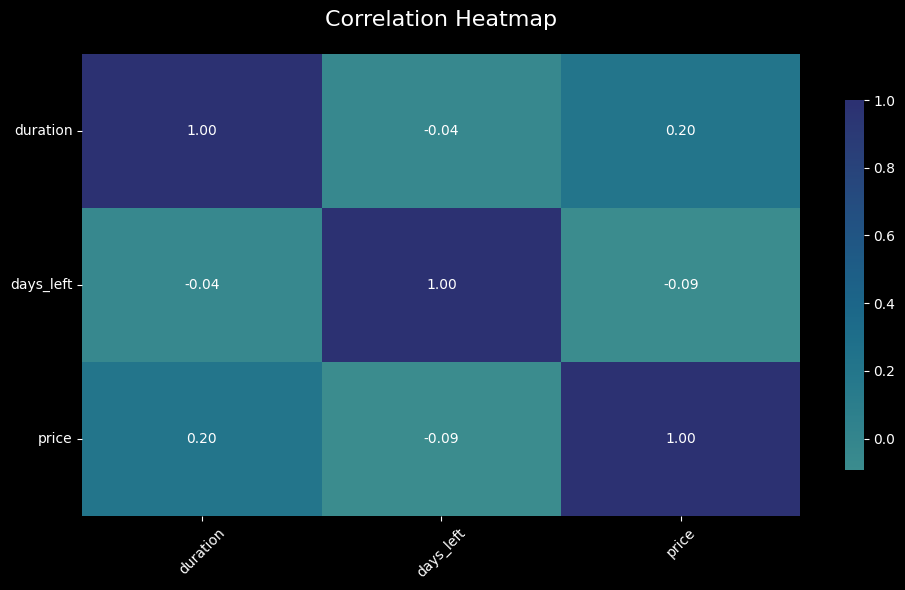

In [187]:
# Make Pearons correlation 

def pear1():

    # Seleect only numeric types 
    numeric_df = da1a.select_dtypes(include='number') 

    # Make a correlation  matrix 
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 6))

    # Generate a mask for the upper triangle (optional, for cleaner look)
    sns.heatmap(
        corr_matrix,
        annot=True,           # Show correlation values in cells
        cmap='crest',      # Color scheme: red = positive, blue = negative
        center=0,             # Center color at zero
        square=False,         # Cells don't need to be square
        fmt='.2f',            # Format numbers to 2 decimal places
        cbar_kws={"shrink": 0.8}  # Shrink color bar
    )
    
    plt.title("Correlation Heatmap", fontsize=16, pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

pear1()